In [23]:
# Want to get my database data into a dataframe for plotting
### Imports
import mysql.connector
from mysql.connector.constants import ClientFlag
import pandas as pd
from matplotlib import pyplot as plt
from src import config
from src import data_viewer
import numpy as np

In [24]:
# SQL connection
config = {
    'user':config.user,
    'password':config.password,
    'host':config.host,
    'client_flags':[ClientFlag.SSL],
    'ssl_ca':'server-ca.pem',
    'ssl_cert':'client-cert.pem',
    'ssl_key':'client-key.pem',
    'database':config.database
    }
connection = mysql.connector.connect(**config)
#config['database'] = 'testdb'
cursor = connection.cursor()

In [25]:
### Getting a dataframe
#print_all(cursor,connection)
df = data_viewer.select_all(cursor,connection)

Select all from database:


In [26]:
df

,0,1,2
0,"2020-12-06, 21:13",20.3,66.8
1,"2020-12-06, 21:14",20.3,66.6
2,"2020-12-06, 21:16",20.3,66.5
3,"2020-12-06, 21:26",20.3,66.6
4,"2020-12-06, 21:36",20.2,66.8
...,...,...,...
127,"2020-12-07, 19:08",19.8,62.4
128,"2020-12-07, 19:18",19.7,62.4
129,"2020-12-07, 19:28",19.6,62.3
130,"2020-12-07, 19:38",19.6,62.3


In [27]:
df.columns=['Timestamp','Temp','Hum']
df.set_index('Timestamp',inplace=True)

In [28]:
df

,Temp,Hum
Timestamp,,
"2020-12-06, 21:13",20.3,66.8
"2020-12-06, 21:14",20.3,66.6
"2020-12-06, 21:16",20.3,66.5
"2020-12-06, 21:26",20.3,66.6
"2020-12-06, 21:36",20.2,66.8
...,...,...
"2020-12-07, 19:08",19.8,62.4
"2020-12-07, 19:18",19.7,62.4
"2020-12-07, 19:28",19.6,62.3


In [29]:
df.index = pd.to_datetime(df.index)

In [30]:
hour_avg = df.resample('H').mean()

In [38]:
hour_avg

,Temp,Hum
Timestamp,,
2020-12-06 21:00:00,20.185714,66.757143
2020-12-06 22:00:00,19.783333,67.233333
2020-12-06 23:00:00,19.783333,66.500000
2020-12-07 00:00:00,19.733333,66.083333
2020-12-07 01:00:00,19.566667,66.100000
2020-12-07 02:00:00,19.433333,65.983333
2020-12-07 03:00:00,19.333333,65.983333
2020-12-07 04:00:00,19.233333,65.816667
2020-12-07 05:00:00,19.166667,65.816667


(0.0, 25.0)

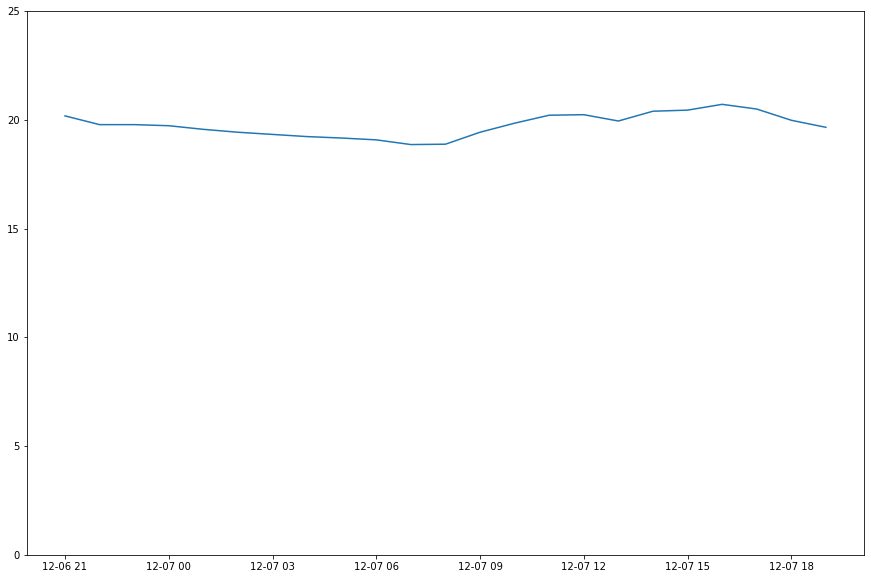

In [48]:
n = hour_avg.shape[0]
fig = plt.figure(figsize=[15,10])
ax = plt.axes()

ax.plot(hour_avg['Temp'])
ax.set_ylim(0,25)
#ax.set_xticklabels(rotation=30, ha='right')